In [10]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test




time series ends   2011-12-30


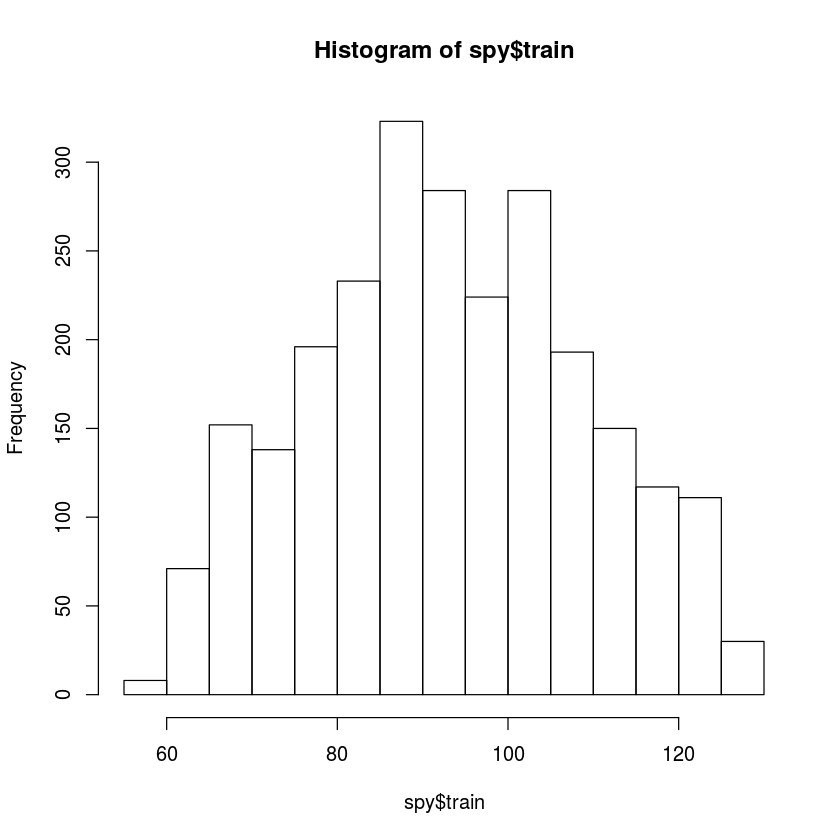

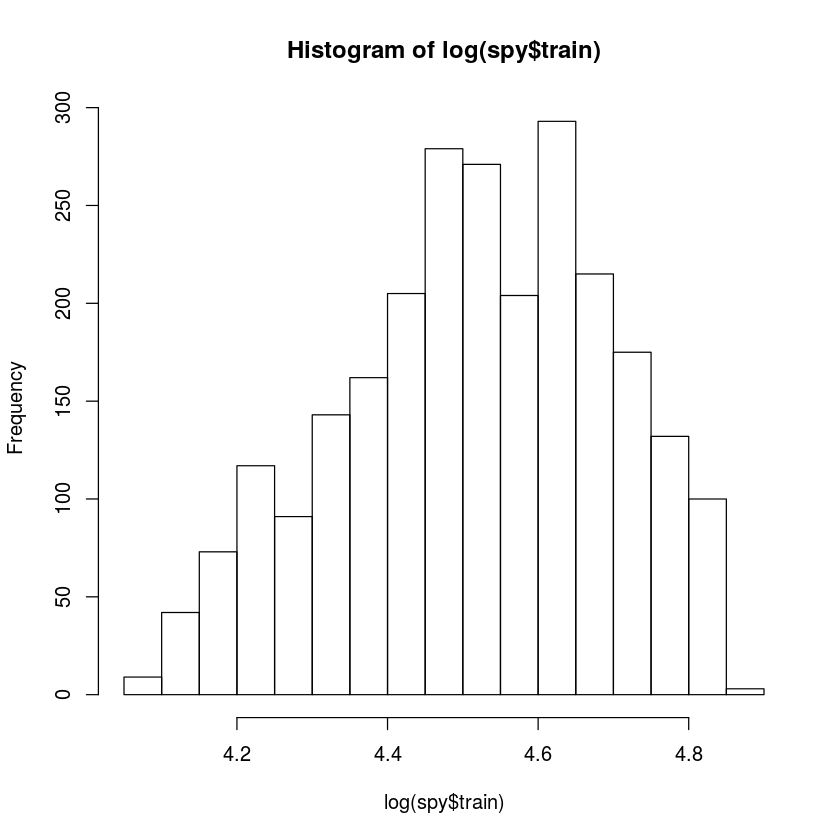

In [11]:
hist(spy$train)
hist(log(spy$train))

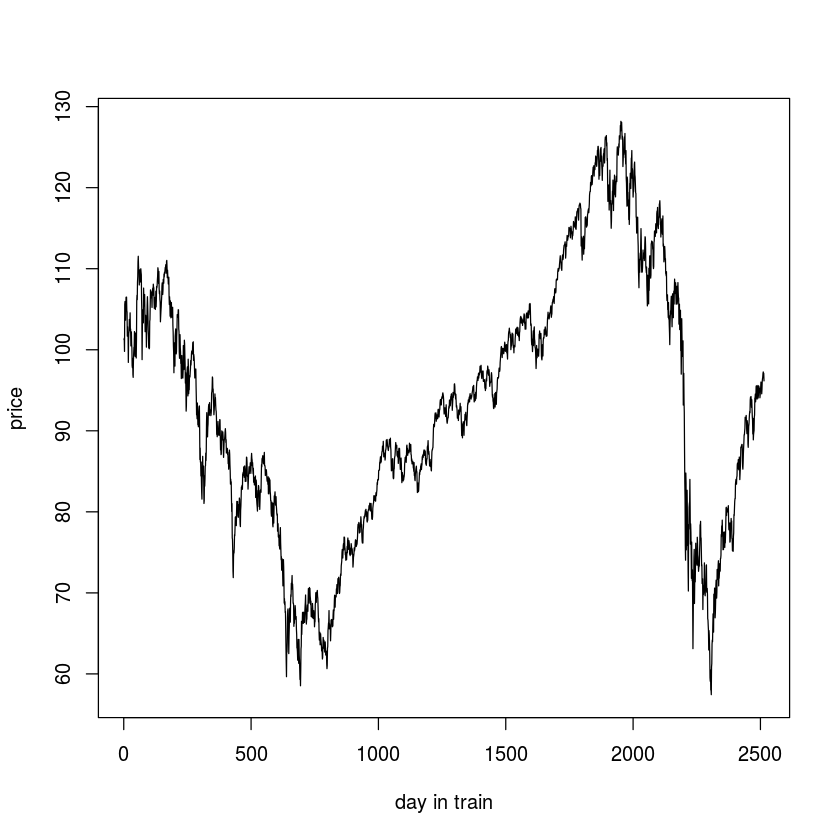

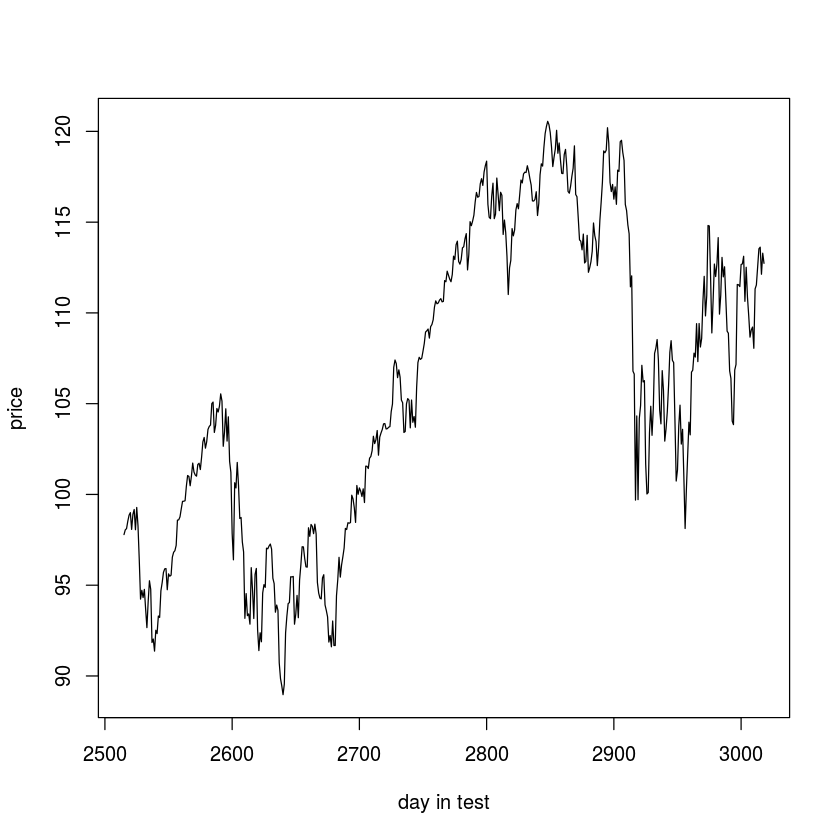

In [12]:
plot(spy$train,ylab='price', xlab='day in train')

plot.ts(spy$test,ylab='price', xlab='day in test')

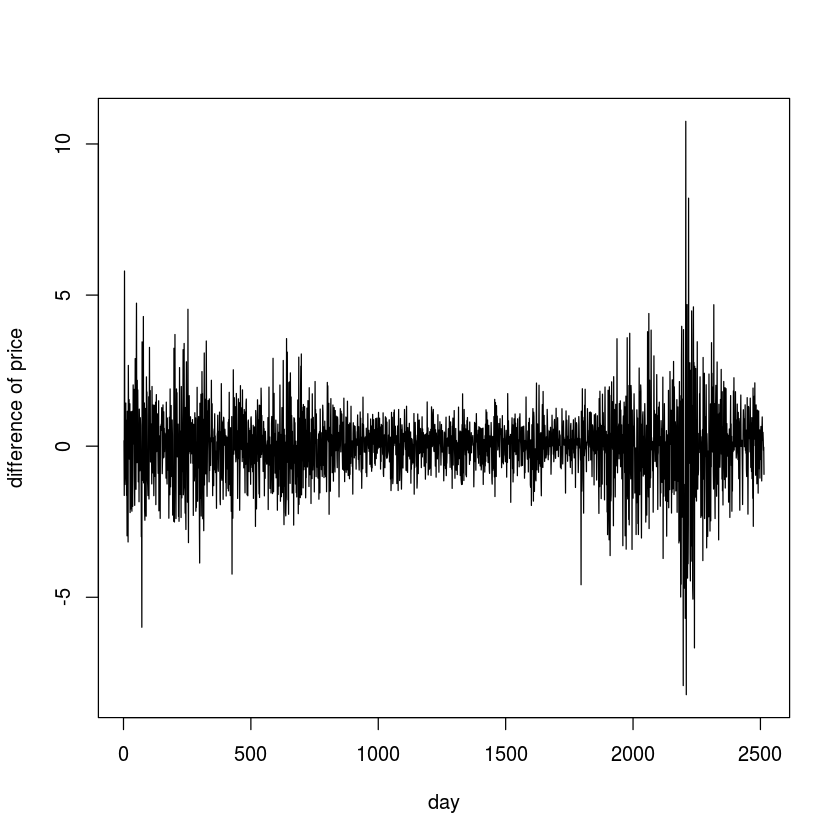

In [13]:
spy$train_diff = diff(spy$train)

plot.ts(spy$train_diff,ylab="difference of price", xlab="day")



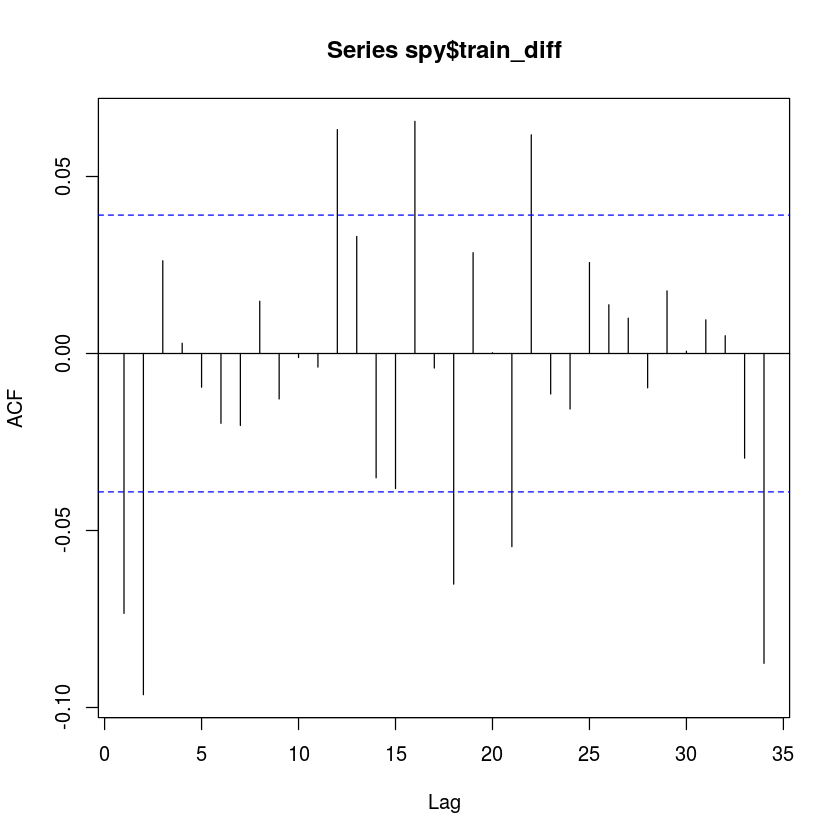

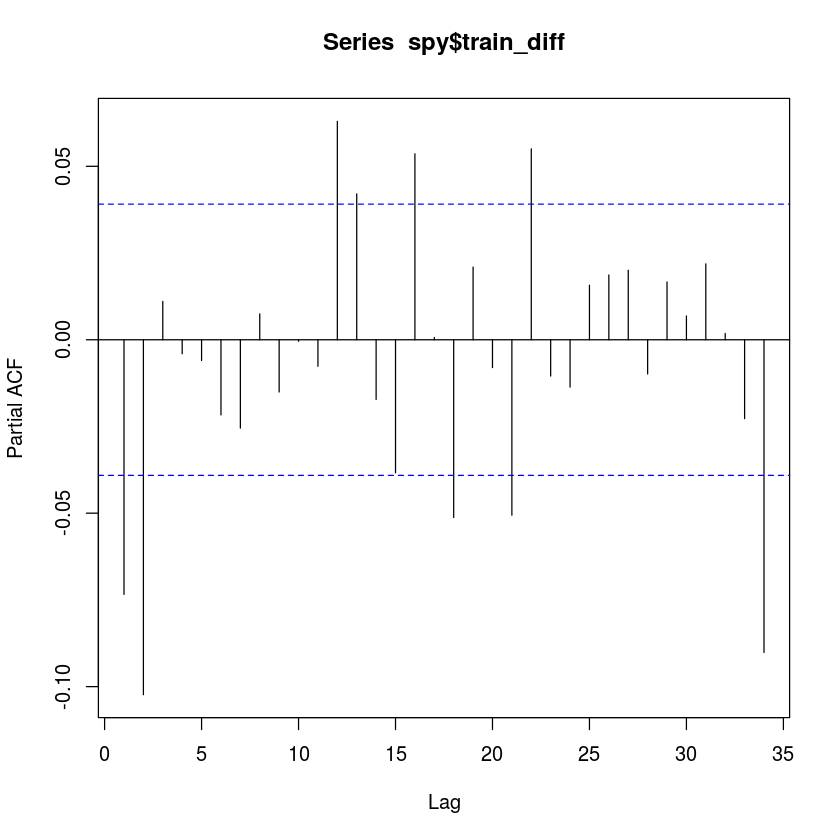

In [14]:
#adf.test(spy$train_diff)
acf(spy$train_diff, na.action= na.pass)
pacf(spy$train_diff, na.action= na.pass)

In [15]:
library(TSA)



eacf(spy$train_diff)

#spy$train_diff

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x x o o o o o o o o o  x  x  o 
2 x o x o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  x  o  o 
4 x x o o o o o o o o o  o  o  o 
5 x x x o x o o o o o o  o  o  o 
6 x x x x x o o o o o o  o  o  o 
7 x x x x x x x o o o o  o  o  o 


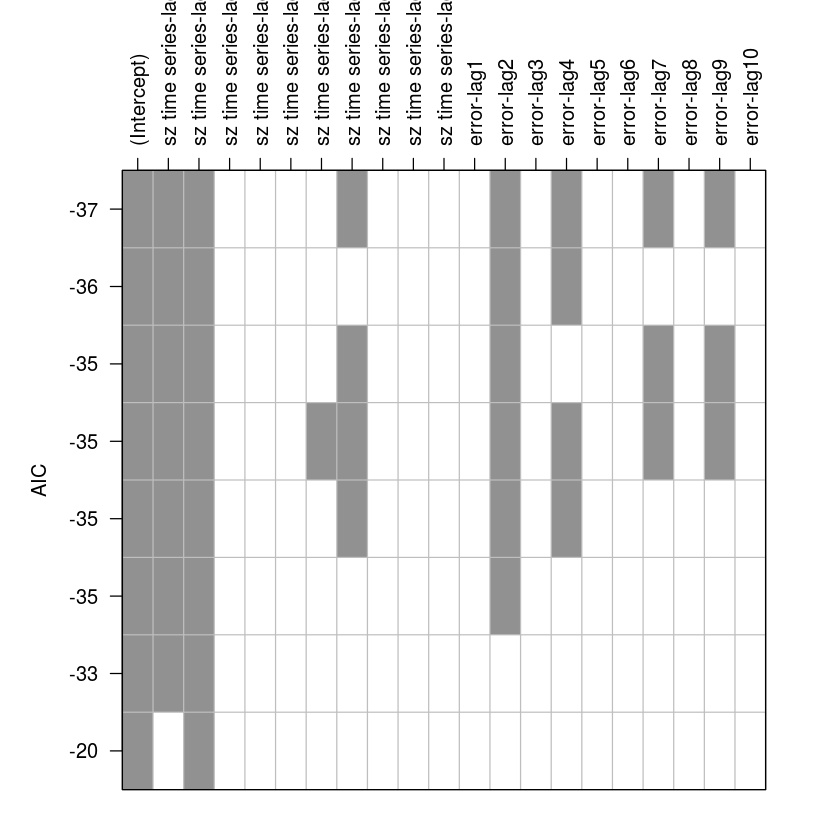

In [16]:
subsets = armasubsets(spy$train_diff, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")

Series: spy$train 
ARIMA(2,1,1)                    

Coefficients:
          ar1      ar2     ma1
      -0.1955  -0.1107  0.1158
s.e.   0.1943   0.0232  0.1955

sigma^2 estimated as 1.448:  log likelihood=-4029.47
AIC=8066.94   AICc=8066.96   BIC=8090.26

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002263683,1.202387,0.8398826,-0.0135001,0.9453896,0.9992845,-5.742158e-05,NA
Test set,5.498500354,9.239839,6.9068653,4.9136868,6.4335250,8.2177237,9.838847e-01,7.7219


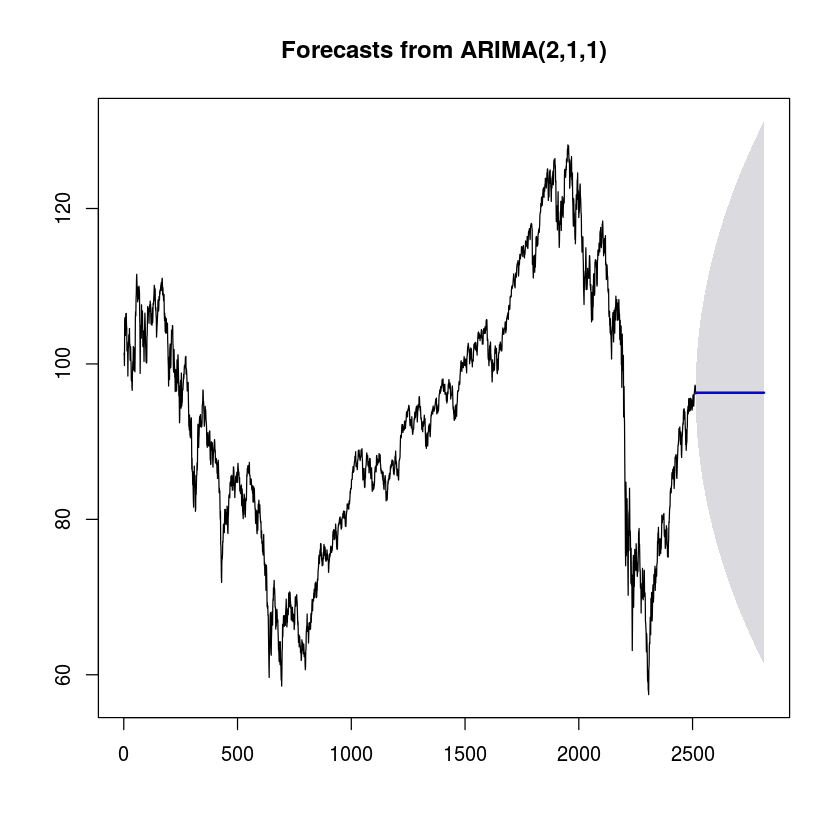

In [17]:
library(forecast)
fit1 = Arima(spy$train, order=c(2,1,1))
fit1


fit1_forecast = forecast(fit1, h=300,level=c(0.95))
accuracy(fit1_forecast, spy$test)
plot(fit1_forecast)

Series: spy$train 
ARIMA(7,1,7)                    

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6      ar7      ma1
      0.3020  0.1620  -0.2351  0.5797  -0.4246  -0.5033  -0.0005  -0.3844
s.e.  0.1248  0.0907   0.2143  0.1521   0.1240   0.1489   0.2203   0.1246
          ma2     ma3      ma4     ma5     ma6      ma7
      -0.2318  0.3033  -0.6007  0.4269  0.5164  -0.1000
s.e.   0.0661  0.2305   0.1657  0.1194  0.1636   0.2189

sigma^2 estimated as 1.442:  log likelihood=-4018.48
AIC=8066.96   AICc=8067.15   BIC=8154.4

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002286329,1.197101,0.8375727,-0.013684,0.9428058,0.9965361,0.0001768532,NA
Test set,9.545714538,12.704990,10.4140058,8.433060,9.3696876,12.3904865,0.9854764532,8.630445


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): argument "x" is missing, with no default


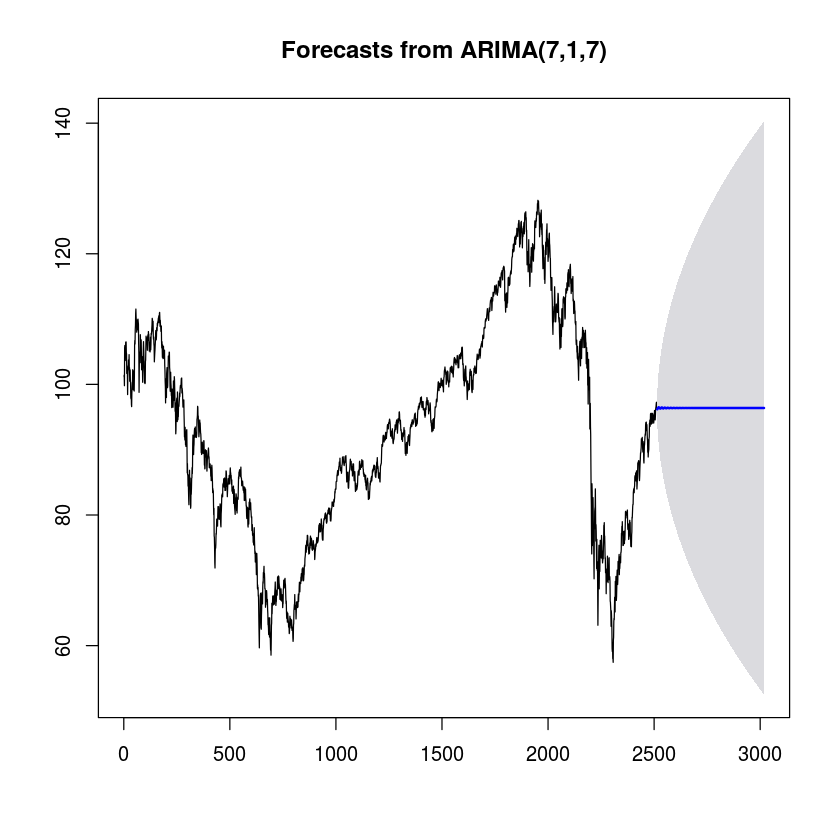

In [18]:
fit2 = Arima(spy$train, order=c(7,1,7))
fit2

fit2_forecast = forecast(fit2, h=test_len,level=c(0.95))
accuracy(fit2_forecast, spy$test)
plot(fit2_forecast)
plot()

Series: spy$train 
ARIMA(9,1,0)                    

Coefficients:
          ar1      ar2     ar3      ar4      ar5      ar6      ar7     ar8
      -0.0801  -0.1023  0.0103  -0.0066  -0.0105  -0.0229  -0.0264  0.0065
s.e.   0.0199   0.0200  0.0202   0.0202   0.0202   0.0202   0.0202  0.0201
          ar9
      -0.0151
s.e.   0.0200

sigma^2 estimated as 1.449:  log likelihood=-4027.65
AIC=8075.29   AICc=8075.38   BIC=8133.58

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002417804,1.201512,0.8384785,-0.01416772,0.9439419,0.9976138,-6.321201e-05,NA
Test set,9.644276029,12.779204,10.4792007,8.52669240,9.4277466,12.4680549,9.854455e-01,8.681491


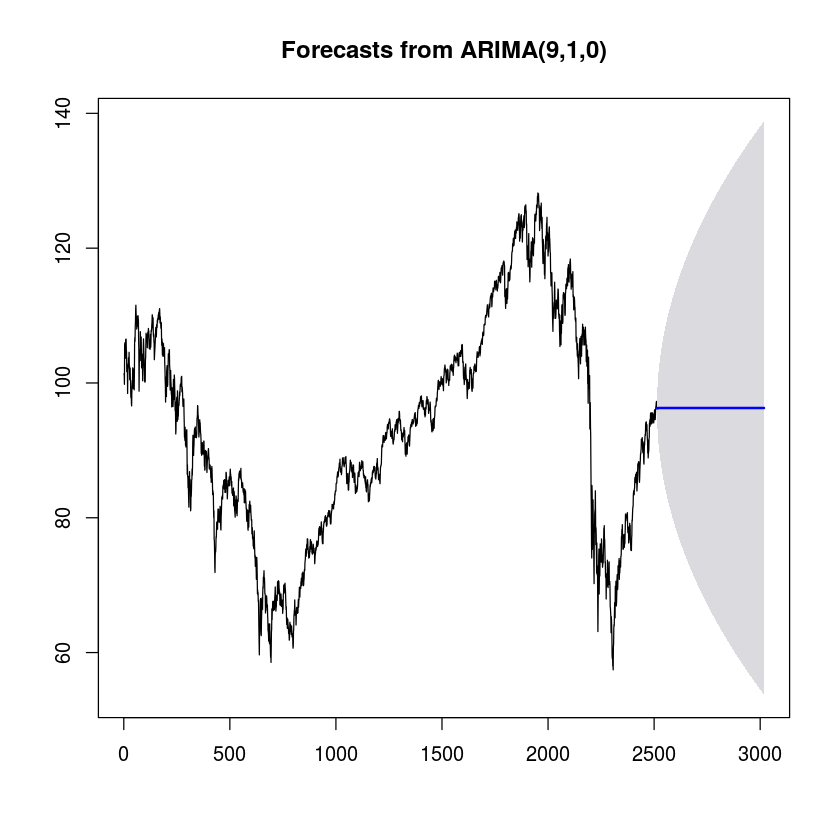

In [20]:
fit3 = Arima(spy$train, order=c(9,1,0))
fit3

fit3_forecast = forecast(fit3, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test)
plot(fit3_forecast)

Series: spy$train 
ARIMA(0,1,9)                    

Coefficients:
          ma1      ma2     ma3     ma4      ma5      ma6      ma7     ma8
      -0.0796  -0.0959  0.0283  0.0002  -0.0124  -0.0170  -0.0180  0.0123
s.e.   0.0199   0.0200  0.0204  0.0204   0.0203   0.0192   0.0215  0.0193
          ma9
      -0.0152
s.e.   0.0219

sigma^2 estimated as 1.45:  log likelihood=-4027.79
AIC=8075.58   AICc=8075.67   BIC=8133.87

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002417804,1.201512,0.8384785,-0.01416772,0.9439419,0.9976138,-6.321201e-05,NA
Test set,9.644276029,12.779204,10.4792007,8.52669240,9.4277466,12.4680549,9.854455e-01,8.681491


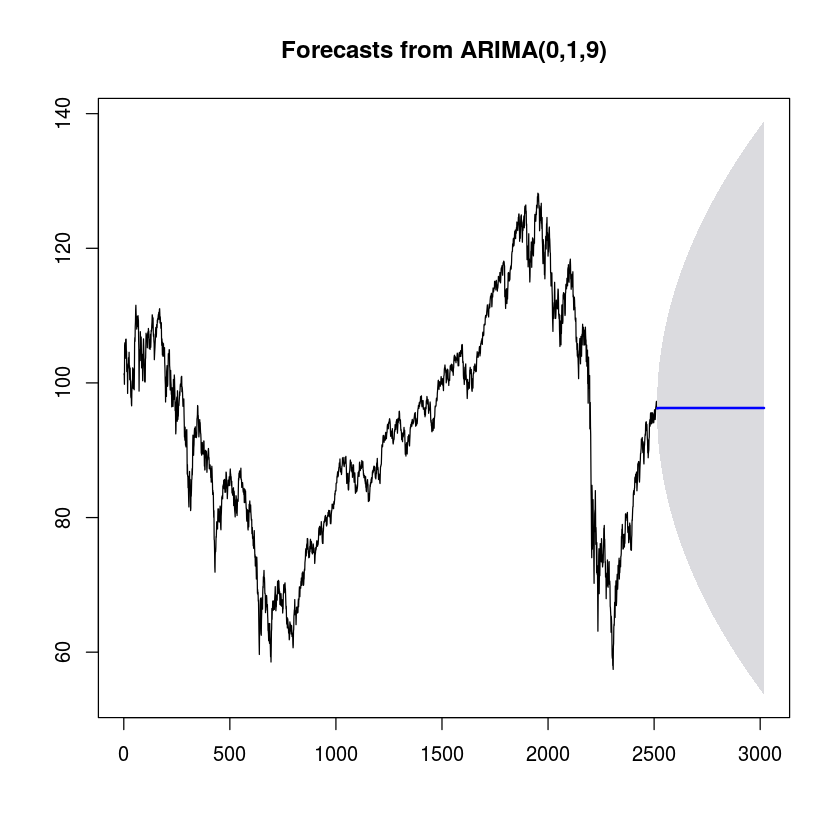

In [21]:
fit4 = Arima(spy$train, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test)
plot(fit4_forecast)

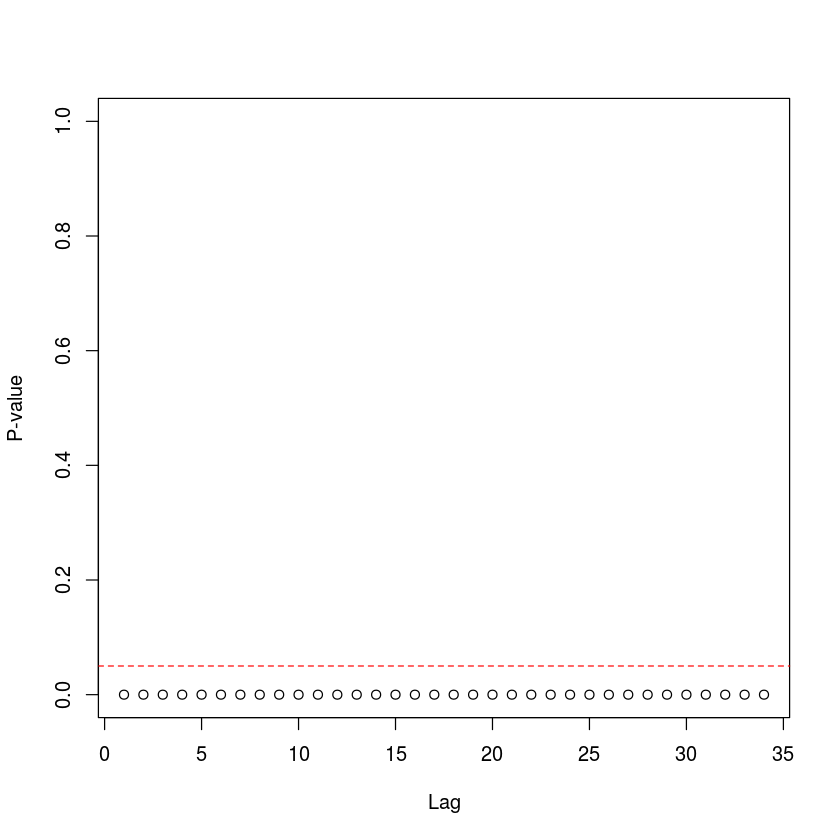

In [22]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [23]:
shapiro.test(spy$train_diff) # test if the data's normality


	Shapiro-Wilk normality test

data:  spy$train_diff
W = 0.9341, p-value < 2.2e-16


In [24]:
#install.packages('fBasics')
library(fBasics)

skewness(spy$train_diff) # testing for skewness
kurtosis(spy$train_diff)

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

Loading required package: timeSeries

Attaching package: ‘timeSeries’

The following object is masked from ‘package:zoo’:

    time<-



Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


[1] -0.0347883
attr(,"method")
[1] "moment"

[1] 6.898108
attr(,"method")
[1] "excess"